In [51]:
import numpy as np
import math
import pandas as pd

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('legend',fontsize=15) 

In [52]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model

In [53]:
import pickle

In [54]:
import scipy
from scipy.stats import rv_histogram

import seaborn as sns

### Functions - common for each notebook

In [55]:
from basic_functions import trajectory, trajectory_intervals, generate_nn_input, check_distribution, plot_distribution

### Functions - modified for each case

In [56]:
def trajectories(T, n, k, Wiener=None):
  
    h = float(T/n)
    h_sqrt = np.sqrt(h)
    X_real = []
    X_approx = []
    T_ = []
  
    for j in range(k):
        
        X_real_temp = x_0
        X_approx_temp = x_0

        x_real = [X_real_temp]
        x_approx = [X_approx_temp]

        t_temp = 0.0
        t = [t_temp]
        
        for i in range(1, n+1):

            if Wiener is not None:
                dW = Wiener[i-1]

            else:
                dW = np.random.normal(0, h_sqrt)

            X_r = X_real_temp + a(t_temp, X_real_temp)*h + b_real(t_temp, X_real_temp)*dW
            x_real.append(X_r)  

            X_a = X_approx_temp + a(t_temp, X_approx_temp)*h + ((np.sin(X_approx_temp)+1.5)*sigma_[i]+2)*dW
            x_approx.append(X_a)  

            t_temp = i*h
            t.append(t_temp)

            X_real_temp = X_r
            X_approx_temp = X_a

        X_real.append(x_real)
        X_approx.append(x_approx)


        T_.append(t)

        if (len(np.array(X_real).flatten()) != len(np.array(X_approx).flatten())):
            print("Trajectories have different length")
      
    return np.array(T_).flatten(), np.array(X_real).flatten(), np.array(X_approx).flatten()

In [57]:
def trajectories_intervals(T, n, k, Wiener=None):
  
    h = float(T/n)
    h_sqrt = np.sqrt(h)
    X_real = []
    X_approx = []
    
    X_approx_lower_ = []
    X_approx_upper_ = []
    
    
    T_ = []
  
    for j in range(k):
        
        X_real_temp = x_0
        X_approx_temp = x_0

        x_real = [X_real_temp]
        x_approx = [X_approx_temp]
        x_approx_lower = [X_approx_temp]
        x_approx_upper = [X_approx_temp]

        t_temp = 0.0
        t = [t_temp]
        
        for i in range(1, n+1):

            if Wiener is not None:
                dW = Wiener[i-1]

            else:
                dW = np.random.normal(0, h_sqrt)

            X_r = X_real_temp + a(t_temp, X_real_temp)*h + b_real(t_temp, X_real_temp)*dW
            x_real.append(X_r)  

            X_a = X_approx_temp + a(t_temp, X_approx_temp)*h + ((np.sin(X_approx_temp)+1.5)*sigma_[i]+2)*dW
            x_approx.append(X_a)  
            

            X_a_lower = X_approx_temp + a(t_temp, X_approx_temp) * h - 2 * np.abs((np.sin(X_approx_temp)+1.5)*sigma_[i]+2) * np.sqrt(h)
            X_a_upper = X_approx_temp + a(t_temp, X_approx_temp) * h + 2 * np.abs((np.sin(X_approx_temp)+1.5)*sigma_[i]+2) * np.sqrt(h)
            x_approx_lower.append(X_a_lower)  
            x_approx_upper.append(X_a_upper)  
        

            t_temp = i*h
            t.append(t_temp)

            X_real_temp = X_r
            X_approx_temp = X_a

        X_real.append(x_real)
        X_approx.append(x_approx)
        X_approx_lower_.append(x_approx_lower)
        X_approx_upper_.append(x_approx_upper)


        T_.append(t)

        if (len(np.array(X_real).flatten()) != len(np.array(X_approx).flatten())):
            print("Trajectories have different length")
      
    return np.array(T_).flatten(), np.array(X_real).flatten(), np.array(X_approx).flatten(), np.array(X_approx_lower_).flatten(), np.array(X_approx_upper_).flatten()

### Step 1. Define an equation

In [58]:
def kappa(t):
    return 0.4

def mu(t):
    return 0.0

def sigma(t):
    return 2*np.sin(2*np.pi*t)+t

In [59]:
def a(t, x):
    return kappa(t)*np.cos(x)

def b(t, x):
    return (np.sin(x)+1.5)*sigma(t)+2

In [60]:
x_0 = 1.2

In [61]:
equation = [x_0, a, b]

### Step 2. Simulation

In [62]:
# time
T = 3.8

# number of points
n = 10000

# number of trajectories
k = 1

In [63]:
# set the Wiener process

h = float(T/n)
h_sqrt = np.sqrt(h)

wiener_process = [np.random.normal(0, h_sqrt) for i in range(n)]

# file = open('wiener_process_example_03', 'rb')
# wiener_process = pickle.load(file)
# file.close()

In [64]:
t_values, x_values = trajectory(T, n, k, equation, wiener_process)

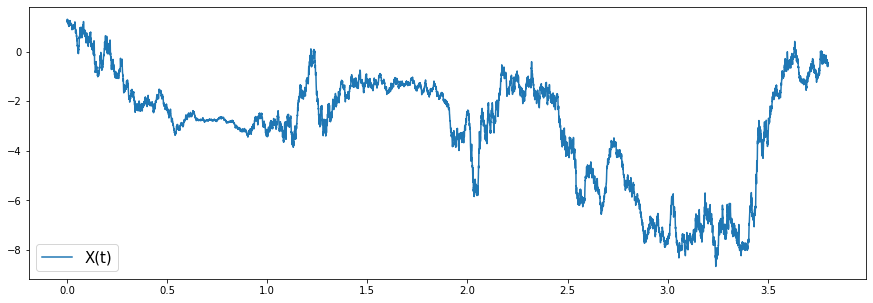

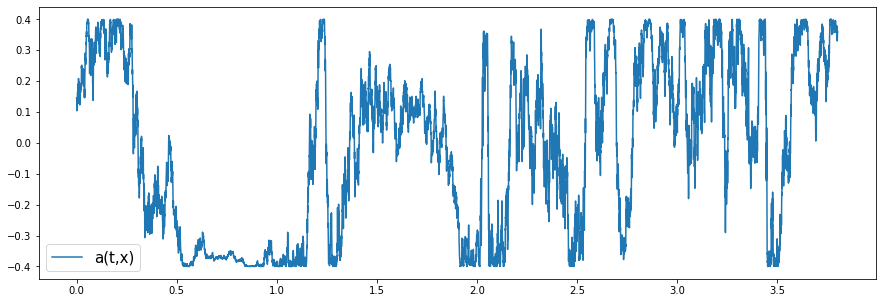

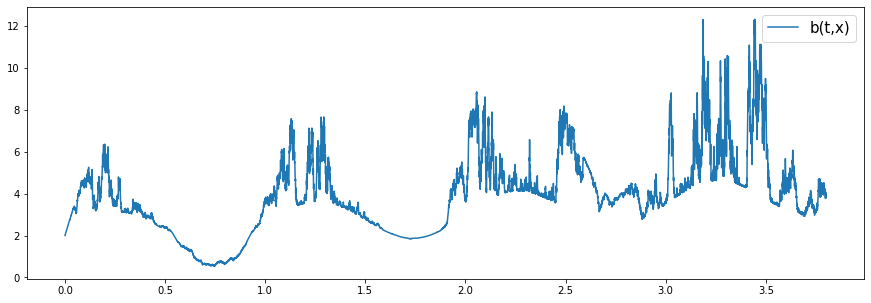

In [65]:
plt.plot(t_values, x_values, label='X(t)')
plt.legend()
plt.show()

plt.plot(t_values, a(t_values,x_values), label='a(t,x)')
plt.legend()
plt.show()

plt.plot(t_values, b(t_values,x_values), label='b(t,x)')
plt.legend()
plt.show()

In [66]:
t_values, x_values, x_low, x_up = trajectory_intervals(T, n, k, equation, wiener_process)

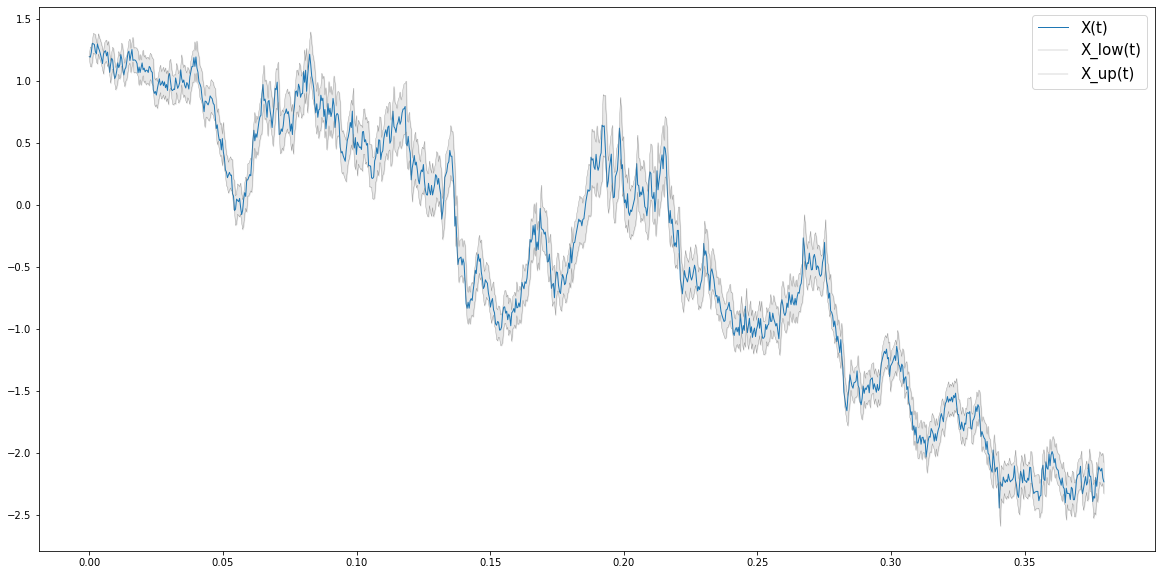

In [67]:
k = 1000

t = t_values[:k]
x1=x_values[:k]
x2=x_low[:k]
x3=x_up[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='X(t)', linewidth=1)
plt.plot(t, x2, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x3, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t_values[:1000], x2, x3, color='lightgrey',alpha=0.5)


plt.legend()
plt.show()

### Step 3. Estimate chosen parameter using neural network

#### 3.1 Loss function

In [68]:
def a_(t, x):
    return kappa(t)*tf.cos(x)

def b_(t, x, sigma):
    return (tf.sin(x)+1.5)*sigma+2

In [69]:
def SDE_params_loss(y_true,y_pred):
   
    sigma=tf.slice(y_pred,[0,0],[-1,1])
    x_diff = tf.slice(y_true,[0,2],[-1,1])
    h = tf.slice(y_true,[0,3],[-1,1])
    x = tf.slice(y_true,[0,1],[-1,1])
    t = tf.slice(y_true,[0,0],[-1,1])

    A = tf.math.log(2*math.pi*h*tf.square((b_(t,x,sigma))))
    B = tf.square(x_diff - a_(t,x)*h) / (2*h * tf.square(b_(t,x,sigma)))
    loss = tf.reduce_sum(A/2.0+B,axis=0)
    
    return loss

#### 3.2 Neural network model

In [70]:
x_data, y_data = generate_nn_input(t_values, x_values)

In [71]:
model =  Sequential()
model.add(Dense(20, activation='sigmoid',batch_input_shape=(None, 1)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=SDE_params_loss,
              optimizer=optimizers.Adam(learning_rate=0.0005),
              metrics=[SDE_params_loss])

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                40        
                                                                 
 dense_6 (Dense)             (None, 50)                1050      
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 20)                620       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3,261
Trainable params: 3,261
Non-trainable params: 0
_________________________________________________________________


In [73]:
# plot_model(model, to_file='model_04_plot.png', show_shapes=True, show_layer_names=True)

#### 3.3 Training

In [74]:
def a_(t, x):
    return kappa(t)*tf.cos(x)

def b_(t, x, sigma):
    return (tf.sin(x)+1.5)*sigma+2

In [75]:
history=model.fit(x_data, y_data, 
                  batch_size=4, 
                  epochs=1050,
                  verbose=1
                 )

Epoch 1/1050
2500/2500 [==============================] - 4s 1ms/step - loss: -4.2250 - SDE_params_loss: -4.2250
Epoch 2/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.3316 - SDE_params_loss: -4.3316
Epoch 3/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.3830 - SDE_params_loss: -4.3830
Epoch 4/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.3845 - SDE_params_loss: -4.3845
Epoch 5/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.3917 - SDE_params_loss: -4.3917
Epoch 6/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.3955 - SDE_params_loss: -4.3955
Epoch 7/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.4009 - SDE_params_loss: -4.4009
Epoch 8/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.4053 - SDE_params_loss: -4.4053
Epoch 9/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.4045 - SDE_para

2500/2500 [==============================] - 3s 1ms/step - loss: -4.8822 - SDE_params_loss: -4.8822A: 1s - loss: -
Epoch 138/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8852 - SDE_params_loss: -4.8852A: 0s - loss: -4.9086 - SDE_params_loss:
Epoch 139/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8864 - SDE_params_loss: -4.8864
Epoch 140/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8854 - SDE_params_loss: -4.8854
Epoch 141/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8764 - SDE_params_loss: -4.8764A: 0s - loss: -4.8851 - SDE_params_loss: -4.
Epoch 142/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8854 - SDE_params_loss: -4.8854
Epoch 143/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8909 - SDE_params_loss: -4.8909A: 1s - loss: -4.9
Epoch 144/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8900 - SDE

2500/2500 [==============================] - 3s 1ms/step - loss: -4.8953 - SDE_params_loss: -4.8953A: 2s -
Epoch 272/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8924 - SDE_params_loss: -4.8924
Epoch 273/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8954 - SDE_params_loss: -4.8954
Epoch 274/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8909 - SDE_params_loss: -4.8909
Epoch 275/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8924 - SDE_params_loss: -4.8924
Epoch 276/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8985 - SDE_params_loss: -4.8985
Epoch 277/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8918 - SDE_params_loss: -4.8918A: 2s - - ETA: 0s - loss: -4.8911 - SDE_params_loss: -4.891
Epoch 278/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -4.8906 - SDE_params_loss: -4.8906
Epoch 279/1050
2500/2500 [===

2500/2500 [==============================] - 3s 1ms/step - loss: -5.0692 - SDE_params_loss: -5.0692
Epoch 406/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0648 - SDE_params_loss: -5.0648
Epoch 407/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0725 - SDE_params_loss: -5.0725
Epoch 408/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0687 - SDE_params_loss: -5.0687A: 0s - loss: -5.0843 - SDE_pa
Epoch 409/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0683 - SDE_params_loss: -5.0683
Epoch 410/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0616 - SDE_params_loss: -5.0616
Epoch 411/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0686 - SDE_params_loss: -5.0686
Epoch 412/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0649 - SDE_params_loss: -5.0649
Epoch 413/1050
2500/2500 [==============================] - 3s 1m

2500/2500 [==============================] - 3s 1ms/step - loss: -5.0742 - SDE_params_loss: -5.0742
Epoch 541/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0716 - SDE_params_loss: -5.0716A: 0s - loss: -5.0676 - SDE_params_loss: -5.
Epoch 542/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0707 - SDE_params_loss: -5.0707
Epoch 543/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0791 - SDE_params_loss: -5.0791
Epoch 544/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0718 - SDE_params_loss: -5.0718
Epoch 545/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0762 - SDE_params_loss: -5.0762
Epoch 546/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0683 - SDE_params_loss: -5.0683
Epoch 547/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0715 - SDE_params_loss: -5.0715A: 2s - loss: -5.0234 - - ETA: 1s - loss: -5.0820 - 

Epoch 673/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0776 - SDE_params_loss: -5.0776
Epoch 674/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0787 - SDE_params_loss: -5.0787
Epoch 675/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0767 - SDE_params_loss: -5.0767
Epoch 676/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0759 - SDE_params_loss: -5.0759
Epoch 677/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0721 - SDE_params_loss: -5.0721
Epoch 678/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0724 - SDE_params_loss: -5.0724
Epoch 679/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0768 - SDE_params_loss: -5.0768
Epoch 680/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0760 - SDE_params_loss: -5.0760
Epoch 681/1050
2500/2500 [==============================] - 3s 1ms/step - loss: 

2500/2500 [==============================] - 3s 1ms/step - loss: -5.0756 - SDE_params_loss: -5.0756A: 1s - loss: -5.1155  - ETA: 0s - loss: -5.0828 - SDE_params_lo
Epoch 809/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0772 - SDE_params_loss: -5.0772
Epoch 810/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0740 - SDE_params_loss: -5.0740
Epoch 811/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0815 - SDE_params_loss: -5.0815
Epoch 812/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0787 - SDE_params_loss: -5.0787
Epoch 813/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0761 - SDE_params_loss: -5.0761
Epoch 814/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0787 - SDE_params_loss: -5.0787
Epoch 815/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0769 - SDE_params_loss: -5.0769
Epoch 816/1050
2500/2500 [=====

2500/2500 [==============================] - 3s 1ms/step - loss: -5.0863 - SDE_params_loss: -5.0863
Epoch 941/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0794 - SDE_params_loss: -5.0794
Epoch 942/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0783 - SDE_params_loss: -5.0783
Epoch 943/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0779 - SDE_params_loss: -5.0779
Epoch 944/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0797 - SDE_params_loss: -5.0797
Epoch 945/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0765 - SDE_params_loss: -5.0765
Epoch 946/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0769 - SDE_params_loss: -5.0769
Epoch 947/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0772 - SDE_params_loss: -5.0772
Epoch 948/1050
2500/2500 [==============================] - 3s 1ms/step - loss: -5.0826 - SDE_p

In [76]:
result = model.predict(t_values)
sigma_ = result[:,0]

file = open('sigma_example_03', 'wb')
pickle.dump(sigma_, file)
file.close()

### Step 4. Evaluation of the results

#### 4.1 Results from neural network

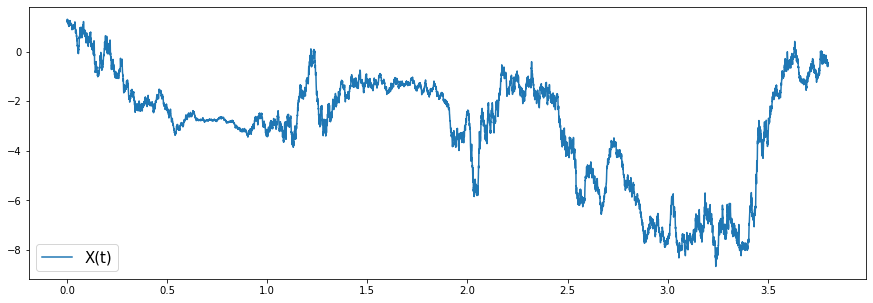

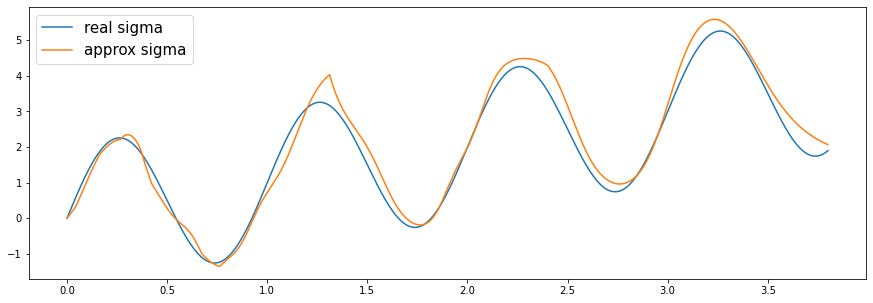

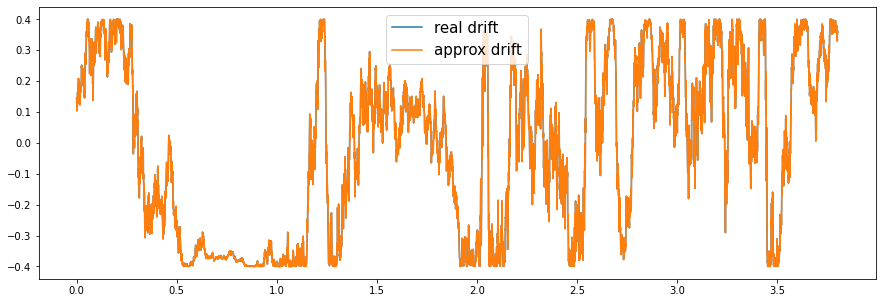

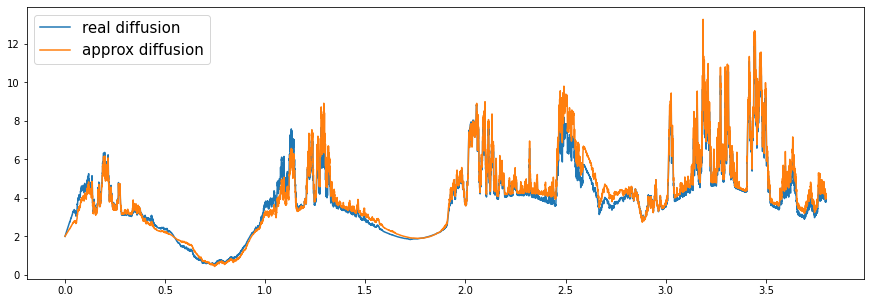

In [77]:
file = open('sigma_example_03', 'rb')
sigma_ = pickle.load(file)
file.close()


plt.plot(t_values, x_values, label='X(t)')
plt.legend()
plt.show()

plt.plot(t_values, sigma(t_values), label='real sigma')
plt.plot(t_values, sigma_, label='approx sigma')
plt.legend()
plt.savefig("example_03_sigma.png")
plt.show()

plt.plot(t_values, a(t_values,x_values), label='real drift')
plt.plot(t_values, a_(t_values,x_values), label='approx drift')
plt.legend()
plt.savefig("example_03_drift.png")
plt.show()


plt.plot(t_values, b(t_values,x_values), label='real diffusion')
plt.plot(t_values, b_(t_values,x_values, sigma_), label='approx diffusion')
plt.legend()
plt.savefig("example_03_diffusion.png")
plt.show()


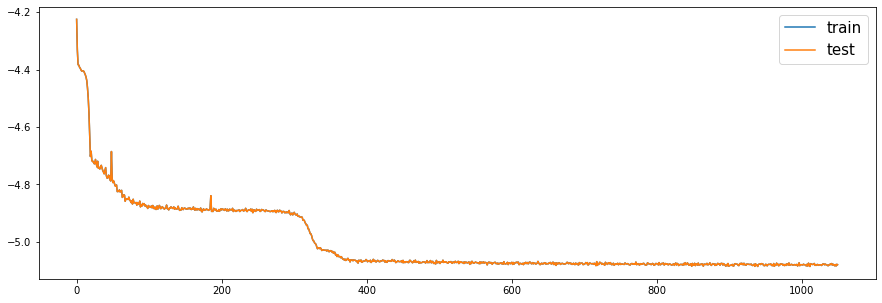

In [78]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['SDE_params_loss'], label='test')
plt.legend()
plt.show()

#### 4.2 Trajectories of both processes with prediction intervals

In [79]:
def b_real(t, x):
    return (np.sin(x)+1.5)*sigma(t)+2

In [80]:
def b_approx(t,x):
    return (np.sin(x)+1.5)*sigma_+2

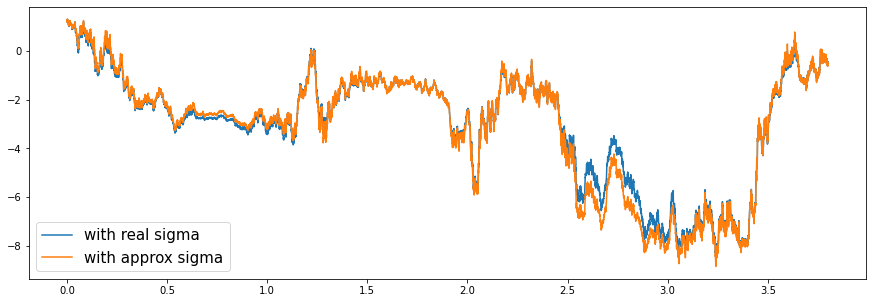

In [81]:
t_values, x_real_values, x_approx_values = trajectories(T,n,1,wiener_process)

fig = plt.figure(figsize=(15,5))
plt.plot(t_values, x_real_values, label='with real sigma')
plt.plot(t_values, x_approx_values, label='with approx sigma')
plt.legend()

plt.savefig("example_03_trajectory.png")
plt.show()

In [82]:
t_values, x_real_values, x_approx_values, x_approx_low_values, x_approx_up_values = trajectories_intervals(T,n,1,wiener_process)

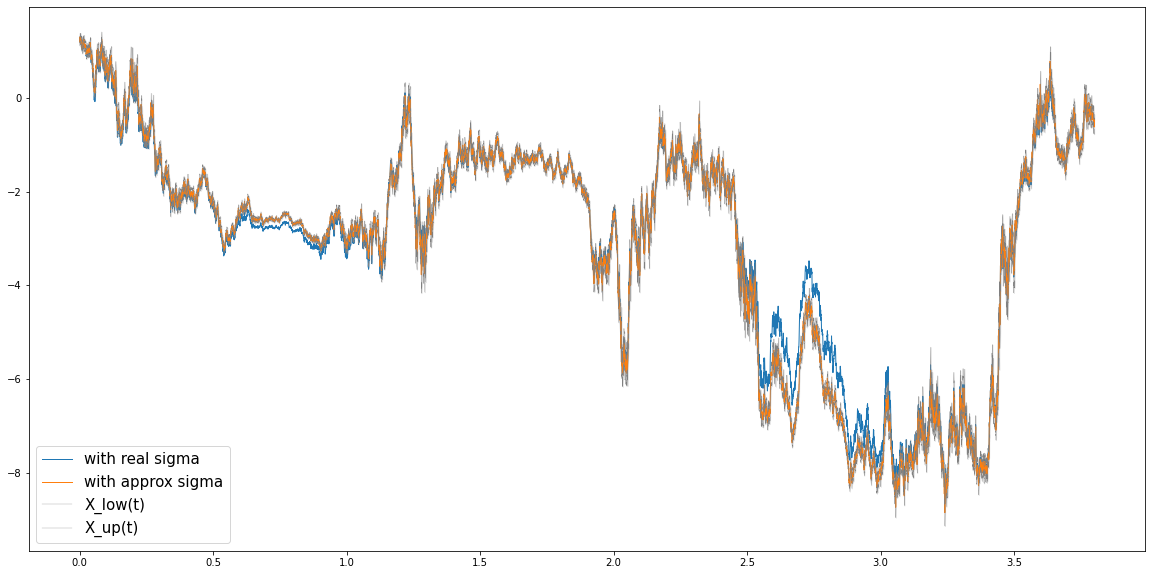

In [83]:
k = n

t = t_values[:k]
x1=x_real_values[:k]
x2=x_approx_values[:k]
x3=x_approx_low_values[:k]
x4=x_approx_up_values[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real sigma', linewidth=1)
plt.plot(t, x2, label='with approx sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)


plt.legend()
plt.show()

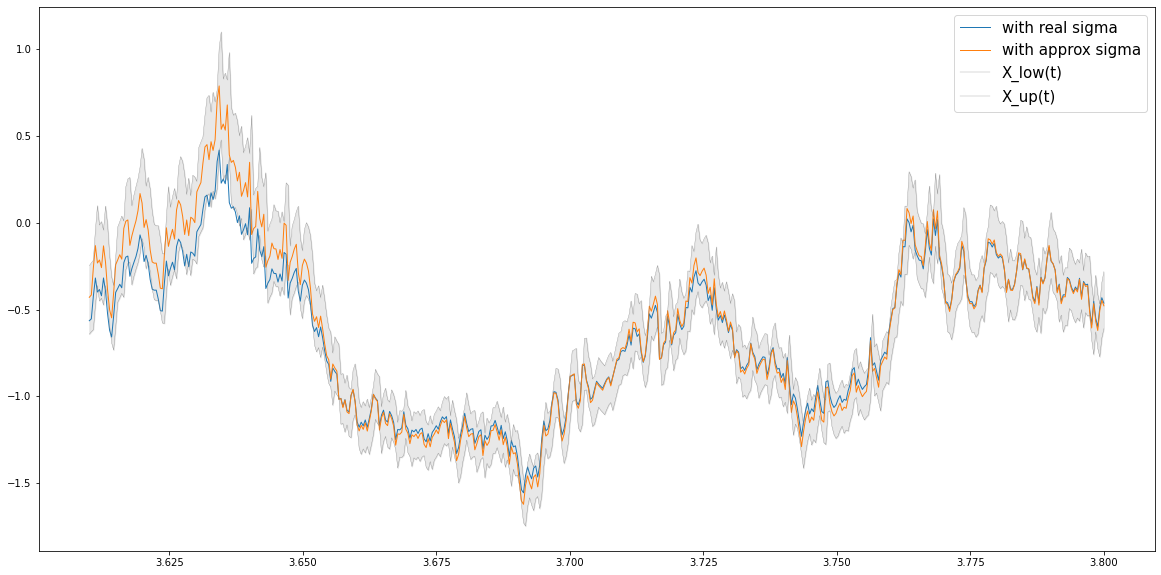

In [84]:
k = 500

t = t_values[n-k:]
x1=x_real_values[n-k:]
x2=x_approx_values[n-k:]
x3=x_approx_low_values[n-k:]
x4=x_approx_up_values[n-k:]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real sigma', linewidth=1)
plt.plot(t, x2, label='with approx sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)

plt.legend()
plt.show()

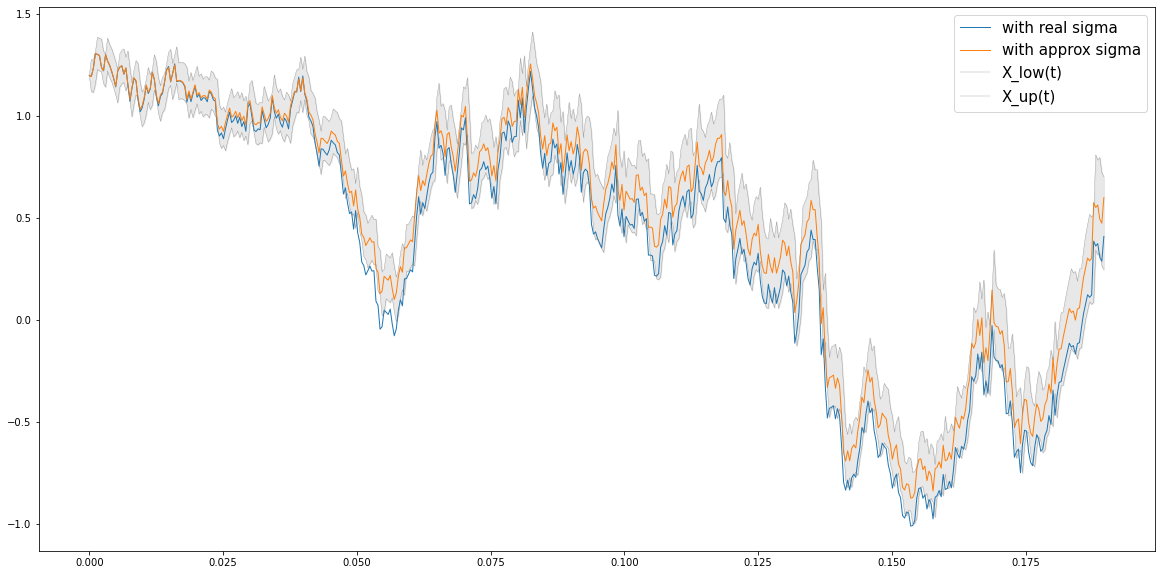

In [85]:
k = 500

t = t_values[:k]
x1=x_real_values[:k]
x2=x_approx_values[:k]
x3=x_approx_low_values[:k]
x4=x_approx_up_values[:k]

plt.figure(figsize=(20,10))
plt.plot(t, x1, label='with real sigma', linewidth=1)
plt.plot(t, x2, label='with approx sigma', linewidth=1)
plt.plot(t, x3, label='X_low(t)', color='grey', linewidth=0.3)
plt.plot(t, x4, label='X_up(t)', color='grey', linewidth=0.3)

plt.fill_between(t, x3, x4, color='lightgrey',alpha=0.5)

plt.legend()
plt.show()

#### 4.3 Simulate many trajectories to see both distributions

In [86]:
n_traj = 100

In [87]:
X_tab, X_approx_tab = check_distribution(T, n, n_traj, trajectories)

Mean value for real:  1.6997650769528017
Mean value for approx:  1.7035777861905073
Standard deviation for real:  10.198730391976982
Standard deviation for approx:  10.778292012567244


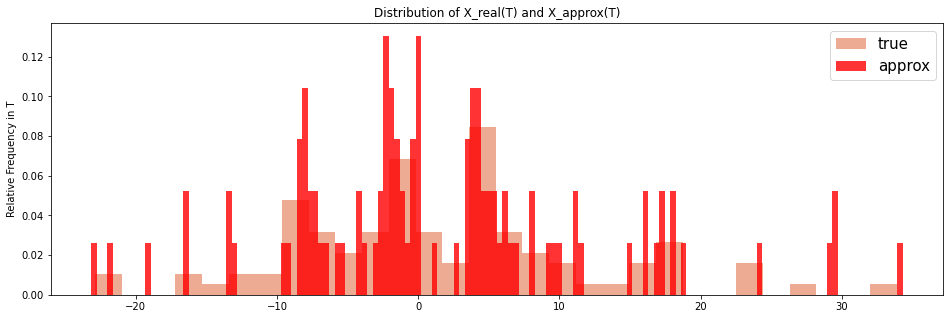

In [88]:
plot_distribution(X_tab, X_approx_tab)

In [89]:
def exp_val_approx(X, X_approx):
    return sum(np.square(np.abs(np.subtract(X,X_approx))))/len(X)

In [90]:
exp_val_approx(X_tab, X_approx_tab)

3.041894803344288

In [91]:
np.sqrt(exp_val_approx(X_tab, X_approx_tab))

1.744102864897678

In [92]:
# SAVE DATA AS PICKLE

result_tab = np.array([X_tab, X_approx_tab])

file = open('01_results_100', 'wb')
pickle.dump(result_tab, file)
file.close()

In [93]:
# OPEN IF NEEDED

file = open('01_results_100', 'rb')
data = pickle.load(file)
file.close()

X_tab = data[0]
X_approx_tab = data[1]